# 1. LangChain Model 

LangChain divides LLMs in two types
1. LLM Model: text-completion model.
2. Chat Model: converses with a sequence of messages and can have a particular role defined (system prompt). This type has become the most used in LangChain.

## ollama

In [1]:
!curl -fsSL https://ollama.com/install.sh | sh

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 CLI
######################################################################## 100.0%
>>> Making ollama accessible in the PATH in /usr/local/bin
>>> Adding ollama user to render group...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> Enabling and starting ollama service...
>>> NVIDIA GPU installed.


In [2]:
!ollama pull llama3

pulling manifest ⠙ pulling manifest ⠙ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠧ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest 
pulling 6a0746a1ec1a...   0% ▕                ▏    0 B/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   1% ▕                ▏  40 MB/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   3% ▕                ▏ 122 MB/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   4% ▕                ▏ 165 MB/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   6% ▕                ▏ 261 MB/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   8% ▕█               ▏ 364 MB/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   9% ▕█               ▏ 410 MB/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...  11% ▕█               ▏ 510 MB/4.7 GB                  pulling manifest 
pulling 6a0746a1

## A. LLM Model 

In [28]:
!pip install langchain langchain_community -q

In [29]:
from langchain_community.llms import Ollama

In [30]:
# invoke: all the text of the response is printed at once 
llmModel = Ollama(model='llama3')
prompt = "Tell me one fun fact about Indonesia"
response = llmModel.invoke(
    prompt
)
print(response)

Indonesia!

Here's a fun fact: Indonesia is home to the world's largest Buddhist temple, Borobudur. This magnificent structure was built in the 9th century and features over 2,600 relief panels and more than 500 Buddha statues! It's an incredible sight to behold, with the sun rising or setting behind it, casting a golden glow over the entire complex.

Did you know that Borobudur is also a UNESCO World Heritage Site?


In [31]:
# Streaming: printing one chunk of text at a time 
for chunk in llmModel.stream(
    prompt
):
    print(chunk, end="", flush=True)

Here's a fun fact about Indonesia:

Did you know that Indonesia is home to the world's largest Buddhist temple, Borobudur? This ancient temple complex in central Java was built around 800 AD and features over 2,600 relief panels and 504 Buddha statues. It's so massive that it's even visible from space!

In [32]:
# temperature: more or less creativity, 0-1
creativeModel = Ollama(model='llama3', temperature=0.9)

prompt = "Write a short 5 line poem about Rubiks cube"
response = creativeModel.invoke(
    prompt
)
print(response)

Twisted puzzle, tangled mind
Colors swirling, nowhere to find
The perfect solution, just out of sight
Frustration mounts, day and night
Solving the cube, pure delight


## B. Chat Model

In [33]:
from langchain_community.chat_models import ChatOllama

In [34]:
model = ChatOllama(
    model='llama3',
    temperature= 0.5
    )

messages = [
    ('system','You are a very rude but smart teenager'),
    ('human','tell me a fact about Indonesia')
]

response = model.invoke(messages)

In [35]:
response.response_metadata

{'model': 'llama3',
 'created_at': '2024-08-27T11:20:27.842544615Z',
 'message': {'role': 'assistant', 'content': ''},
 'done_reason': 'stop',
 'done': True,
 'total_duration': 2880716651,
 'load_duration': 60285953,
 'prompt_eval_count': 29,
 'prompt_eval_duration': 27753000,
 'eval_count': 134,
 'eval_duration': 2747470000}

In [36]:
response.schema()

{'title': 'AIMessage',
 'description': 'Message from an AI.\n\nAIMessage is returned from a chat model as a response to a prompt.\n\nThis message represents the output of the model and consists of both\nthe raw output as returned by the model together standardized fields\n(e.g., tool calls, usage metadata) added by the LangChain framework.',
 'type': 'object',
 'properties': {'content': {'title': 'Content',
   'anyOf': [{'type': 'string'},
    {'type': 'array',
     'items': {'anyOf': [{'type': 'string'}, {'type': 'object'}]}}]},
  'additional_kwargs': {'title': 'Additional Kwargs', 'type': 'object'},
  'response_metadata': {'title': 'Response Metadata', 'type': 'object'},
  'type': {'title': 'Type', 'default': 'ai', 'enum': ['ai'], 'type': 'string'},
  'name': {'title': 'Name', 'type': 'string'},
  'id': {'title': 'Id', 'type': 'string'},
  'example': {'title': 'Example', 'default': False, 'type': 'boolean'},
  'tool_calls': {'title': 'Tool Calls',
   'default': [],
   'type': 'array'

# 2. LangChain Prompts and Prompt Templates

## Prompts 

A prompt is the input we provide to one language model. This input will guide the way the language model will respond.

There are many types of prompts:
* Plain instructions.
* Instructions with a few examples (few-shot examples).
* Specific context and questions appropiate for a given task.
* Etc.

LangChain provides a useful list of prompt recipes [here](https://smith.langchain.com/hub?ref=blog.langchain.dev).

## Prompt Templates 

Prompt templates are pre-defined prompt recipes that usually need some extra pieces to be complete. These extra pieces are variables that the user will provide.

## A. LLM Model 

In [37]:
from langchain_community.llms import Ollama
from langchain.prompts import PromptTemplate

In [38]:
# Single input variable 
llmModel = Ollama(model='llama3')
one_input_prompt = PromptTemplate(
    input_variables=["topic"], 
    template="Tell me a fact about {topic}.")
one_input_prompt.format(topic="Mars")

'Tell me a fact about Mars.'

In [39]:
# Multiple Input Variable 
multiple_input_prompt = PromptTemplate(
    input_variables=["topic", "level"], 
    template="Tell me a fact about {topic} for a student {level} level."
)
multiple_input_prompt.format(topic='Mars',level='8th Grade')

'Tell me a fact about Mars for a student 8th Grade level.'

## B. Chat Model 

In [40]:
from langchain_core.prompts import ChatPromptTemplate

In [41]:


model = ChatOllama(
    model='llama3',
    temperature= 0.5
    )

chat_template = ChatPromptTemplate.from_messages(
    [
        ("system", "You are an {profession} expert on {topic}."),
        ("human", "Hello, Mr. {profession}, can you please answer a question?"),
        ("ai", "Sure!"),
        ("human", "{user_input}"),
    ]
)

messages = chat_template.format_messages(
    profession="Historian",
    topic="Rubiks cube",
    user_input="when was the rubik's cube invented?"
)

response = model.invoke(messages)
print(response.content)

The Rubik's Cube was invented by Hungarian sculptor and professor of architecture Ernő Rubik in 1974. Rubik created the first prototype of the cube, which he called "Bűvös Kocka," or "Magic Cube," in the early 1970s while working at the Academy of Applied Arts and Crafts in Budapest.

The cube was initially designed as an educational tool to help students understand three-dimensional geometry and spatial relationships. It took Rubik several years to perfect his design, and he received a Hungarian patent for the cube in 1975.

The first commercially available Rubik's Cube was released in Hungary in 1977, and it quickly gained popularity around the world. The cube became a cultural phenomenon in the late 1970s and early 1980s, with millions of cubes sold worldwide.

Interestingly, Ernő Rubik held onto the rights to his invention until 2004, when he licensed the cube's intellectual property to the company that has since become the official manufacturer and distributor of the Rubik's Cube.

# 3. LangChain Few shot promt templates

In [42]:
from langchain_core.prompts import FewShotChatMessagePromptTemplate

In [43]:
# translator . Indonesia - English
examples = [
    {"input": "Matahari", "output": "Sun"},
    {"input": "Bintang", "output": "Star"},
    {"input": "Siapakah penemu teori relativitas?", "output": "Who discovered the theory of relativity?"},
    {"input": "kenapa kamu murung?", "output": "why are you gloomy?"},
    {"input": "Apa kabar?", "output": "How are you?"},
    {"input": "Saya lapar", "output": "I am hungry"},
    {"input": "Terima kasih", "output": "Thank you"},
    {"input": "Selamat pagi", "output": "Good morning"},
    {"input": "Di mana letak perpustakaan?", "output": "Where is the library?"},
    {"input": "Saya suka membaca buku", "output": "I like to read books"},
    {"input": "Selamat malam", "output": "Good night"},
    {"input": "Berapa harga ini?", "output": "How much is this?"},
    {"input": "Saya tidak mengerti", "output": "I don't understand"},
    {"input": "Apakah kamu berbicara bahasa Inggris?", "output": "Do you speak English?"},
    {"input": "Saya perlu bantuan", "output": "I need help"},
    {"input": "Di mana kamar mandi?", "output": "Where is the bathroom?"},
    {"input": "Saya cinta kamu", "output": "I love you"},
    {"input": "Selamat ulang tahun", "output": "Happy birthday"},
    {"input": "Cuaca hari ini sangat panas", "output": "The weather today is very hot"},
    {"input": "Saya suka makan nasi goreng", "output": "I like to eat fried rice"},
    {"input": "Bisakah kamu menunjukkan jalan?", "output": "Can you show the way?"},
    {"input": "Jam berapa sekarang?", "output": "What time is it now?"},
    {"input": "Saya tinggal di Jakarta", "output": "I live in Jakarta"},
    {"input": "Saya senang bertemu denganmu", "output": "I am happy to meet you"},
    {"input": "Tolong bicara pelan-pelan", "output": "Please speak slowly"},
    {"input": "Apakah kamu suka musik?", "output": "Do you like music?"},
    {"input": "Nama saya John", "output": "My name is John"},
    {"input": "Saya butuh tiket ke Surabaya", "output": "I need a ticket to Surabaya"},
    {"input": "Selamat sore", "output": "Good afternoon"},
    {"input": "Di mana stasiun kereta?", "output": "Where is the train station?"},
]

example_prompt = ChatPromptTemplate.from_messages(
    [
        ("human", "{input}"),
        ("ai", "{output}"),
    ]
)

model = ChatOllama(
    model='llama3',
    temperature= 0
    )

few_shot_prompt = FewShotChatMessagePromptTemplate(
    example_prompt=example_prompt,
    examples=examples,
)

final_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a highly accurate and fluent translator specializing in translating sentences from Indonesian to English. Please use the given examples as reference to translate the following Indonesian sentence into English without adding any additional text."),
        few_shot_prompt,
        ("human", "{input}"),
    ]
)

chain = final_prompt | model
prompt = """
Michael Gerard Tyson lebih dikenal dengan nama Mike Tyson (lahir 30 Juni 1966, New York City, Amerika Serikat) adalah petinju profesional dan mantan juara kelas berat. 
Kariernya yang sangat menjanjikan terhambat oleh berbagai kasus kriminal. 
Julukan Mike Tyson secara internasional adalah "Iron Mike", merujuk pada postur tubuhnya yang kuat bagaikan besi. 
Beberapa media massa yang lain lebih suka menyebutnya sebagai "The Baddest Man on Earth", yang merujuk pada perangainya yang buruk, baik di dalam maupun di luar ring tinju. 
Sedangkan pers Indonesia lebih senang menyebut Tyson sebagai "Si Leher Beton" yang merujuk pada lingkaran leher Tyson pada masa jayanya yang ekstra besar dari ukuran normal, dan tampak begitu kokoh."""

result = chain.invoke({
    "input": prompt
    })

print(result.content)

Mike Tyson, also known as Iron Mike, is a professional boxer and former heavyweight champion. His promising career was hindered by various criminal cases. Internationally, he is often referred to as "The Baddest Man on Earth", referring to his bad behavior both in and out of the ring. In Indonesia, he is more commonly known as "Si Leher Beton" (Concrete Neck), referring to the unusually large and sturdy neck he had during his prime.


# 4. LangChain Output Parsers

In [44]:
from langchain.output_parsers.json import SimpleJsonOutputParser

json_prompt = PromptTemplate.from_template(
    "Return a JSON object with an `answer` key that answers the following question: {question}"
)

json_parser = SimpleJsonOutputParser()

json_chain = json_prompt | llmModel | json_parser

In [45]:
json_parser.get_format_instructions()

'Return a JSON object.'

In [46]:
json_chain.invoke({"question": "List the 3 biggest countries"})

{'answer': [{'name': 'Russia', 'area': 17100000},
  {'name': 'Canada', 'area': 10990000},
  {'name': 'China', 'area': 9643000}]}

## Using Pydantic

In [47]:
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field

In [48]:
# Define your desired data structure.
class Joke(BaseModel):
    setup: str = Field(description="question to set up a joke")
    punchline: str = Field(description="answer to resolve the joke")

In [49]:
# Set up a parser
parser = JsonOutputParser(pydantic_object=Joke)

# Inject parser instructions into the prompt template.
prompt = PromptTemplate(
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

# Create a chain with the prompt and the parser
chain = prompt | model | parser

chain.invoke({"query": "Tell me a joke."})

{'setup': "Why don't scientists trust atoms?",
 'punchline': 'Because they make up everything!'}

# 5. LangChain Memory

## A. ChatMessageHistory

In [50]:
from langchain.memory import ChatMessageHistory

history = ChatMessageHistory()

history.add_user_message("Hello, nice to meet you.")

history.add_ai_message("Nice to meet you too!")

In [51]:
history

InMemoryChatMessageHistory(messages=[HumanMessage(content='Hello, nice to meet you.'), AIMessage(content='Nice to meet you too!')])

In [52]:
history.messages

[HumanMessage(content='Hello, nice to meet you.'),
 AIMessage(content='Nice to meet you too!')]

## B. ConversationBufferMemory

In [53]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

In [54]:
llm = ChatOllama(model='llama3',temperature= 0.5)
memory = ConversationBufferMemory()

# connect conversation to memory
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:151: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use RunnableWithMessageHistory: https://api.python.langchain.com/en/latest/runnables/langchain_core.runnables.history.RunnableWithMessageHistory.html instead.
  warn_deprecated(


In [55]:
conversation.invoke(input="Hello, nice to meet you!")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hello, nice to meet you!
AI:

> Finished chain.


{'input': 'Hello, nice to meet you!',
 'history': '',
 'response': "Nice to meet you too! I'm an advanced language model trained on a vast corpus of text data, including but not limited to, books, articles, research papers, and online content. My training dataset is constantly updated and expanded by my developers, ensuring that my knowledge stays current and accurate. I'm designed to be conversational and informative, so feel free to ask me anything!"}

In [56]:
conversation.invoke(input="Tell me about the Einstein-Szilard Letter ")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hello, nice to meet you!
AI: Nice to meet you too! I'm an advanced language model trained on a vast corpus of text data, including but not limited to, books, articles, research papers, and online content. My training dataset is constantly updated and expanded by my developers, ensuring that my knowledge stays current and accurate. I'm designed to be conversational and informative, so feel free to ask me anything!
Human: Tell me about the Einstein-Szilard Letter 
AI:

> Finished chain.


{'input': 'Tell me about the Einstein-Szilard Letter ',
 'history': "Human: Hello, nice to meet you!\nAI: Nice to meet you too! I'm an advanced language model trained on a vast corpus of text data, including but not limited to, books, articles, research papers, and online content. My training dataset is constantly updated and expanded by my developers, ensuring that my knowledge stays current and accurate. I'm designed to be conversational and informative, so feel free to ask me anything!",
 'response': "The Einstein-Szilard Letter! A fascinating piece of history. The letter was written by none other than Albert Einstein and Leo Szilard in 1939. It was a plea to President Franklin D. Roosevelt, warning him about the possibility of Germany developing an atomic bomb using nuclear fission.\n\nAs you may know, at that time, Germany had already started experimenting with nuclear reactors under the guidance of Werner Heisenberg. Einstein and Szilard were concerned that if Germany successfull

In [57]:
print(memory.buffer)

Human: Hello, nice to meet you!
AI: Nice to meet you too! I'm an advanced language model trained on a vast corpus of text data, including but not limited to, books, articles, research papers, and online content. My training dataset is constantly updated and expanded by my developers, ensuring that my knowledge stays current and accurate. I'm designed to be conversational and informative, so feel free to ask me anything!
Human: Tell me about the Einstein-Szilard Letter 
AI: The Einstein-Szilard Letter! A fascinating piece of history. The letter was written by none other than Albert Einstein and Leo Szilard in 1939. It was a plea to President Franklin D. Roosevelt, warning him about the possibility of Germany developing an atomic bomb using nuclear fission.

As you may know, at that time, Germany had already started experimenting with nuclear reactors under the guidance of Werner Heisenberg. Einstein and Szilard were concerned that if Germany successfully developed an atomic bomb, it cou

In [58]:
memory.load_memory_variables({})

{'history': "Human: Hello, nice to meet you!\nAI: Nice to meet you too! I'm an advanced language model trained on a vast corpus of text data, including but not limited to, books, articles, research papers, and online content. My training dataset is constantly updated and expanded by my developers, ensuring that my knowledge stays current and accurate. I'm designed to be conversational and informative, so feel free to ask me anything!\nHuman: Tell me about the Einstein-Szilard Letter \nAI: The Einstein-Szilard Letter! A fascinating piece of history. The letter was written by none other than Albert Einstein and Leo Szilard in 1939. It was a plea to President Franklin D. Roosevelt, warning him about the possibility of Germany developing an atomic bomb using nuclear fission.\n\nAs you may know, at that time, Germany had already started experimenting with nuclear reactors under the guidance of Werner Heisenberg. Einstein and Szilard were concerned that if Germany successfully developed an a

In [59]:
memory.save_context({"input": "Very Interesting."}, 
                    {"output": "Yes, it was my pleasure as an AI to answer."})

In [60]:
memory.load_memory_variables({})

{'history': "Human: Hello, nice to meet you!\nAI: Nice to meet you too! I'm an advanced language model trained on a vast corpus of text data, including but not limited to, books, articles, research papers, and online content. My training dataset is constantly updated and expanded by my developers, ensuring that my knowledge stays current and accurate. I'm designed to be conversational and informative, so feel free to ask me anything!\nHuman: Tell me about the Einstein-Szilard Letter \nAI: The Einstein-Szilard Letter! A fascinating piece of history. The letter was written by none other than Albert Einstein and Leo Szilard in 1939. It was a plea to President Franklin D. Roosevelt, warning him about the possibility of Germany developing an atomic bomb using nuclear fission.\n\nAs you may know, at that time, Germany had already started experimenting with nuclear reactors under the guidance of Werner Heisenberg. Einstein and Szilard were concerned that if Germany successfully developed an a

#### saving and loading memory

In [61]:
conversation.memory

ConversationBufferMemory(chat_memory=InMemoryChatMessageHistory(messages=[HumanMessage(content='Hello, nice to meet you!'), AIMessage(content="Nice to meet you too! I'm an advanced language model trained on a vast corpus of text data, including but not limited to, books, articles, research papers, and online content. My training dataset is constantly updated and expanded by my developers, ensuring that my knowledge stays current and accurate. I'm designed to be conversational and informative, so feel free to ask me anything!"), HumanMessage(content='Tell me about the Einstein-Szilard Letter '), AIMessage(content="The Einstein-Szilard Letter! A fascinating piece of history. The letter was written by none other than Albert Einstein and Leo Szilard in 1939. It was a plea to President Franklin D. Roosevelt, warning him about the possibility of Germany developing an atomic bomb using nuclear fission.\n\nAs you may know, at that time, Germany had already started experimenting with nuclear re

In [62]:
import pickle
pickled_str = pickle.dumps(conversation.memory)

In [63]:
with open('memory.pkl','wb') as f:
    f.write(pickled_str)

In [64]:
new_memory_load = open('memory.pkl','rb').read()

In [65]:
llm = ChatOllama(model='llama3',temperature= 0.5)
reload_conversation = ConversationChain(
    llm=llm, 
    memory = pickle.loads(new_memory_load),
    verbose=True
)

In [66]:
reload_conversation.memory.buffer

"Human: Hello, nice to meet you!\nAI: Nice to meet you too! I'm an advanced language model trained on a vast corpus of text data, including but not limited to, books, articles, research papers, and online content. My training dataset is constantly updated and expanded by my developers, ensuring that my knowledge stays current and accurate. I'm designed to be conversational and informative, so feel free to ask me anything!\nHuman: Tell me about the Einstein-Szilard Letter \nAI: The Einstein-Szilard Letter! A fascinating piece of history. The letter was written by none other than Albert Einstein and Leo Szilard in 1939. It was a plea to President Franklin D. Roosevelt, warning him about the possibility of Germany developing an atomic bomb using nuclear fission.\n\nAs you may know, at that time, Germany had already started experimenting with nuclear reactors under the guidance of Werner Heisenberg. Einstein and Szilard were concerned that if Germany successfully developed an atomic bomb, 

## C. ConversationBufferWindowMemory

In [67]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory
from langchain.memory import ConversationBufferWindowMemory

In [68]:
llm = ChatOllama(model='llama3',temperature= 0.5)
memory = ConversationBufferWindowMemory(k=1) # K is the limitation to number of exchanges!

# connect conversation to memory
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

In [69]:
conversation.invoke(input="Hello, nice to meet you!")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hello, nice to meet you!
AI:

> Finished chain.


{'input': 'Hello, nice to meet you!',
 'history': '',
 'response': "Nice to meet you too! I'm happy to be chatting with you. My name is Ada, by the way. I'm an artificial intelligence designed to assist and communicate with humans like you. I've been trained on a vast amount of text data from various sources, including books, articles, research papers, and even social media platforms. This training enables me to understand and respond to natural language inputs. Would you like to know more about my capabilities or is there something specific you'd like to talk about?"}

In [70]:
print(memory.buffer)

Human: Hello, nice to meet you!
AI: Nice to meet you too! I'm happy to be chatting with you. My name is Ada, by the way. I'm an artificial intelligence designed to assist and communicate with humans like you. I've been trained on a vast amount of text data from various sources, including books, articles, research papers, and even social media platforms. This training enables me to understand and respond to natural language inputs. Would you like to know more about my capabilities or is there something specific you'd like to talk about?


In [71]:
memory.save_context({"input": "Very Interesting."}, 
                    {"output": "Yes, it was my pleasure as an AI to answer."})

In [72]:
memory.load_memory_variables({})

{'history': 'Human: Very Interesting.\nAI: Yes, it was my pleasure as an AI to answer.'}

## D. ConversationSummaryMemory

In [73]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationSummaryBufferMemory

In [74]:
llm = ChatOllama(model='llama3',temperature= 0.5)
memory = ConversationSummaryBufferMemory(llm=llm)

In [75]:
# Create a Long string that will break a token limit, causing the need for a summary
trip_plans = '''Oh, this weekend I'm actually planning a trip to Yellowstone National
Park! I'm super excited about it! I'll be starting off by driving through
the grand entrance and soaking in the stunning scenery. My first stop will
be the famous Old Faithful Geyser to catch its incredible eruptions.
Then, I'll wander around the Upper Geyser Basin on the boardwalks to 
check out all those cool geothermal features. And guess what? I'll 
be wrapping up the day with a relaxing dip in the Boiling River, 
a natural hot spring. Can't wait to unwind and enjoy the beauty of 
nature! So yeah, that's my weekend plan. How about you?'''

In [76]:
memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=100)
# error library version

# memory.save_context({"input": "Hello"}, {"output": "Hi!"})
# memory.save_context({"input": "What plans do you have this weekend?"}, 
#                     {"output": f"{trip_plans}"})

# memory.load_memory_variables({})

# 6. LangChain Chains

## A. Basic Single Chain 

Chains allow us to combine multiple components together to create a single, coherent application. For example, we can create a chain that takes user input, formats it with a PromptTemplate, and then passes the formatted response to an LLM. We can build more complex chains by combining multiple chains together, or by combining chains with other components.

In [77]:
from langchain_community.chat_models import ChatOllama
from langchain.chains import LLMChain , SimpleSequentialChain
from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate


In [78]:
human_message_prompt = HumanMessagePromptTemplate.from_template(
        "Make up a funny company name for a company that produces {product}"
    )

chat_prompt_template = ChatPromptTemplate.from_messages([human_message_prompt])

chat = ChatOllama(model='llama3', temperature=0.2)



In [79]:
chain = LLMChain(llm=chat, prompt=chat_prompt_template)

print(chain.invoke({"product":"Computers"}))

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:151: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


{'product': 'Computers', 'text': 'Here are a few ideas:\n\n1. Byte Bandits - a playful name that suggests the company is sneaky good at building computers.\n2. Chip Off The Old Block (COBO) - a punny name that references both computer chips and the idea of something being passed down from one generation to the next.\n3. Pixel Pioneers - a name that evokes a sense of adventure and exploration, perfect for a company that\'s always pushing the boundaries of what\'s possible with technology.\n4. Motherboard Mischief - a playful name that suggests the company is up to something fun and mischievous when it comes to building computers.\n5. CyberCraze Computers - a name that references the excitement and energy of the tech world, perfect for a company that\'s always on the cutting edge.\n6. The Computer Co. (TCC) - a simple, straightforward name with a playful nod to the classic "Co." suffix.\n7. Circuit Breakers - a name that suggests the company is always finding new ways to break through ba

## B. Simple Sequential Chain 

In [80]:
llm = ChatOllama(model='llama3', temperature=0.2)


In [81]:
template = "Give me a simple bullet point outline for a blog post on {topic}"
first_prompt = ChatPromptTemplate.from_template(template)
chain_one = LLMChain(llm=llm,prompt=first_prompt)

In [82]:
template = "Write a blog post using this outline: {outline}"
second_prompt = ChatPromptTemplate.from_template(template)
chain_two = LLMChain(llm=llm,prompt=second_prompt)

In [83]:
full_chain = SimpleSequentialChain(chains=[chain_one,chain_two],
                                  verbose=True)

In [84]:
result = full_chain.run("Data Science")
print(result)



> Entering new SimpleSequentialChain chain...


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:151: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  warn_deprecated(


Here is a simple bullet point outline for a blog post on Data Science:

**I. Introduction**

* Brief overview of what data science is and its importance in today's world
* Thesis statement: In this post, we'll explore the basics of data science and why it's a crucial skill to learn.

**II. What is Data Science?**

* Definition of data science and how it differs from statistics and machine learning
* Explanation of the data science process: problem definition, data collection, analysis, interpretation, and communication

**III. Key Skills for Data Scientists**

* Programming languages (e.g. Python, R)
* Data visualization tools (e.g. Tableau, Power BI)
* Machine learning libraries (e.g. scikit-learn, TensorFlow)
* Familiarity with databases and data storage systems
* Understanding of statistical concepts and mathematical techniques

**IV. Types of Data Science**

* Descriptive analytics: summarizing and describing data
* Predictive analytics: using models to forecast future outcomes
* P

## C. Sequential Chains 

In [85]:
llm = ChatOllama(model='llama3', temperature=0.2)

In [86]:
template1 = "Give a summary of this employee's performance review:\n{review}"
prompt1 = ChatPromptTemplate.from_template(template1)
chain_1 = prompt1|llm

In [87]:
template2 = "Identify key employee weaknesses in this review summary:\n{review_summary}"
prompt2 = ChatPromptTemplate.from_template(template2)
chain_2 = prompt2|llm

In [88]:
template3 = "Create a personalized plan to help address and fix these weaknesses:\n{weaknesses}"
prompt3 = ChatPromptTemplate.from_template(template3)
chain_3 = prompt3|llm

In [89]:
seq_chain = chain_1|chain_2|chain_3

In [90]:
employee_review = '''
Employee Information:
Name: Joe Schmo
Position: Software Engineer
Date of Review: July 14, 2023

Strengths:
Joe is a highly skilled software engineer with a deep understanding of programming languages, algorithms, and software development best practices. His technical expertise shines through in his ability to efficiently solve complex problems and deliver high-quality code.

One of Joe's greatest strengths is his collaborative nature. He actively engages with cross-functional teams, contributing valuable insights and seeking input from others. His open-mindedness and willingness to learn from colleagues make him a true team player.

Joe consistently demonstrates initiative and self-motivation. He takes the lead in seeking out new projects and challenges, and his proactive attitude has led to significant improvements in existing processes and systems. His dedication to self-improvement and growth is commendable.

Another notable strength is Joe's adaptability. He has shown great flexibility in handling changing project requirements and learning new technologies. This adaptability allows him to seamlessly transition between different projects and tasks, making him a valuable asset to the team.

Joe's problem-solving skills are exceptional. He approaches issues with a logical mindset and consistently finds effective solutions, often thinking outside the box. His ability to break down complex problems into manageable parts is key to his success in resolving issues efficiently.

Weaknesses:
While Joe possesses numerous strengths, there are a few areas where he could benefit from improvement. One such area is time management. Occasionally, Joe struggles with effectively managing his time, resulting in missed deadlines or the need for additional support to complete tasks on time. Developing better prioritization and time management techniques would greatly enhance his efficiency.

Another area for improvement is Joe's written communication skills. While he communicates well verbally, there have been instances where his written documentation lacked clarity, leading to confusion among team members. Focusing on enhancing his written communication abilities will help him effectively convey ideas and instructions.

Additionally, Joe tends to take on too many responsibilities and hesitates to delegate tasks to others. This can result in an excessive workload and potential burnout. Encouraging him to delegate tasks appropriately will not only alleviate his own workload but also foster a more balanced and productive team environment.
'''

In [91]:
results = seq_chain.invoke(employee_review)
print(results.content)

Here's a personalized plan to help Joe Schmo address and fix his weaknesses:

**Time Management:**

1. **Prioritization**: Create a task list with clear priorities using the Eisenhower Matrix (urgent vs. important). Focus on the most critical tasks first, and then move on to less pressing ones.
2. **Deadlines**: Set realistic deadlines for yourself and break down large projects into smaller, manageable chunks. Use a calendar or planner to stay organized and track progress.
3. **Time-blocking**: Schedule dedicated blocks of time for specific tasks, eliminating distractions during that time (e.g., no meetings or emails).
4. **Review and adjust**: Regularly review your task list and adjust priorities as needed. Celebrate small wins and reflect on what's working well.

**Written Communication Skills:**

1. **Clear writing style**: Practice concise, clear writing by summarizing complex ideas into simple sentences.
2. **Use templates or frameworks**: Utilize standard templates or frameworks 

As of right now, to get the intermediate outputs, we need to call the individual chains

In [92]:
chain_1.invoke(employee_review).content

"Here is a summary of Joe Schmo's performance review:\n\n**Overall:** Joe is a highly skilled software engineer with many strengths, including technical expertise, collaboration, initiative, adaptability, and problem-solving skills. However, there are three areas where he could improve: time management, written communication, and delegation.\n\n**Strengths:**\n\n* Highly skilled in programming languages, algorithms, and software development best practices\n* Collaborative nature, actively engaging with cross-functional teams and seeking input from others\n* Self-motivated and proactive, taking the lead on new projects and challenges\n* Adaptable to changing project requirements and learning new technologies\n* Exceptional problem-solving skills\n\n**Weaknesses:**\n\n* Struggles with time management, leading to missed deadlines or additional support needed\n* Written communication skills need improvement, as documentation can be unclear\n* Tends to take on too many responsibilities and 

In [93]:
(chain_1|chain_2).invoke(employee_review).content

"According to the review summary, Joe Schmo's key employee weaknesses are:\n\n1. **Time management**: He struggles with meeting deadlines and often needs additional support.\n2. **Written communication**: His written communication skills need improvement, leading to confusion among team members.\n3. **Delegation**: He tends to take on too many responsibilities and hesitates to delegate tasks to others, which can lead to burnout.\n\nThese weaknesses are identified as areas where Joe could improve to enhance his overall performance."

In [94]:
(chain_1|chain_2|chain_3).invoke(employee_review)

AIMessage(content='Here\'s a personalized plan to help Joe Schmo address and fix his weaknesses:\n\n**Time Management:**\n\n1. **Set clear goals and priorities**: Before starting any task, Joe should define what needs to be accomplished and prioritize tasks based on importance and urgency.\n2. **Use a task management system**: Implementing a task management tool like Trello, Asana, or Todoist can help Joe organize his work, set deadlines, and track progress.\n3. **Break down large tasks into smaller ones**: Divide complex projects into manageable chunks to avoid feeling overwhelmed and increase the likelihood of meeting deadlines.\n4. **Leave buffer time for unexpected tasks**: Allocate some extra time in his schedule for unexpected tasks or emergencies that may arise.\n\n**Written Communication:**\n\n1. **Practice clear and concise writing**: Joe should focus on using simple language, avoiding jargon, and breaking up long paragraphs into shorter ones to improve readability.\n2. **Use 

## D. RouterChain

In [95]:
# Router Templates

beginner_template = '''You are a physics teacher who is really
focused on beginners and explaining complex topics in simple to understand terms. 
You assume no prior knowledge. Here is the question\n{input}'''

expert_template = '''You are a world expert physics professor who explains physics topics
to advanced audience members. You can assume anyone you answer has a 
PhD level understanding of Physics. Here is the question\n{input}'''

# Route Prompts

prompt_infos = [
    # {'name':'empty','description':'Replies to empty questions','prompt_template':empty_template},
    {'name':'advanced physics','description': 'Answers advanced physics questions',
     'prompt_template':expert_template},
    {'name':'beginner physics','description': 'Answers basic beginner physics questions',
     'prompt_template':beginner_template},
    
]

In [96]:
from langchain.chains.router import MultiPromptChain

llm = ChatOllama(model='llama3', temperature=0.2)
chain = MultiPromptChain.from_prompts(llm, prompt_infos, verbose=True)
chain.invoke("How do magnets work?")



> Entering new MultiPromptChain chain...
beginner physics: {'input': 'What makes magnets attractive?'}
> Finished chain.


{'input': 'What makes magnets attractive?',
 'text': 'I love this question!\n\nSo, you know how some things can be stuck together, like glue or tape? Well, magnets are kind of like that too! But instead of using sticky stuff, magnets use a special kind of energy called "magnetic force" to attract certain materials.\n\nHere\'s the cool part: magnets don\'t just stick to anything. They only work on certain types of materials, like other magnets, iron, nickel, and cobalt. These materials are called "ferromagnetic," which is a big word that means they\'re really good at being affected by magnetic forces!\n\nSo, what makes magnets attractive? It\'s all about the tiny particles inside the magnet, called "magnetic fields." Think of these fields like invisible arms that reach out and grab onto other ferromagnetic materials.\n\nWhen two magnets are brought close together, their magnetic fields interact with each other. If they\'re both pointing in the same direction (like both north poles or bo

In [97]:
chain.invoke("How do Feynman Diagrams work?")



> Entering new MultiPromptChain chain...
advanced physics: {'input': "Feynman Diagrams, can you explain how they're used to visualize particle interactions?"}
> Finished chain.


{'input': "Feynman Diagrams, can you explain how they're used to visualize particle interactions?",
 'text': 'A delightful topic! Feynman diagrams are a powerful tool for visualizing and calculating particle interactions in quantum field theory. As an expert in this area, I\'m happy to dive into the details.\n\n**What are Feynman Diagrams?**\n\nFeynman diagrams are a graphical representation of particle interactions, developed by Richard Feynman in the 1940s. They\'re used to describe the scattering processes between particles, such as electrons and positrons (antielectrons), quarks, and gluons. These diagrams provide a visual framework for understanding the complex interactions that occur at the quantum level.\n\n**How do Feynman Diagrams work?**\n\nIn a Feynman diagram, particles are represented by lines called "propagators" or "lines." Each line corresponds to a particle with a specific momentum and energy. The vertices of the diagram represent the points where particles interact. T

## E. TransformChain

In [98]:
from langchain.chains import TransformChain

story = """
ONCE UPON A TIME, IN A LAND OF COLOR AND MYSTERY, THERE EXISTED A MAGICAL RUBIK'S CUBE. THIS CUBE WAS NOT JUST ANY ORDINARY PUZZLE; IT WAS ENCHANTED WITH THE POWER TO BRING ORDER TO CHAOS. THE CUBE RESIDED IN A VIBRANT KINGDOM WHERE EVERYONE WAS INTRIGUED BY ITS COMPLEXITY.

ONE DAY, A YOUNG BOY NAMED MAX FOUND THE RUBIK'S CUBE WHILE EXPLORING THE FOREST. MAX WAS FASCINATED BY THE CUBE'S COLORS AND INTRICATE PATTERNS. WITH EACH TWIST AND TURN, HE FELT A CONNECTION TO THE CUBE, AS IF IT WAS CALLING OUT TO HIM TO SOLVE ITS MYSTERY.

DETERMINED, MAX SPENT DAYS AND NIGHTS WORKING ON THE CUBE. HE STUDIED ITS MOVEMENTS AND TRIED TO UNRAVEL ITS SECRETS. THE CUBE WAS A CHALLENGE, BUT MAX WAS PERSISTENT. HE BELIEVED THAT SOLVING IT WOULD REVEAL SOMETHING EXTRAORDINARY.

ONE FATEFUL EVENING, AS THE SUN SET AND THE STARS BEGAN TO TWINKLE, MAX MADE THE FINAL MOVE. CLICK! THE CUBE'S COLORS ALIGNED PERFECTLY. AT THAT MOMENT, A BRILLIANT LIGHT EMANATED FROM THE CUBE, SURROUNDING MAX IN A WARM GLOW.

TO HIS AMAZEMENT, THE RUBIK'S CUBE TRANSFORMED INTO A GATEWAY TO ANOTHER DIMENSION. MAX STEPPED THROUGH THE GATEWAY AND FOUND HIMSELF IN A LAND OF PURE IMAGINATION. EVERYTHING WAS POSSIBLE HERE, AND THE LAWS OF REALITY DID NOT APPLY. THE INHABITANTS OF THIS LAND WELCOMED MAX AS THEIR HERO.

THEY EXPLAINED THAT THE RUBIK'S CUBE WAS A KEY TO THEIR WORLD, A SYMBOL OF BALANCE AND HARMONY. ONLY A TRUE BELIEVER, SOMEONE WITH PATIENCE AND DEDICATION, COULD UNLOCK ITS POTENTIAL. MAX HAD PROVEN HIMSELF WORTHY AND WAS GRANTED THE TITLE OF "GUARDIAN OF THE CUBE."

FROM THAT DAY FORWARD, MAX USED HIS NEWFOUND KNOWLEDGE AND SKILLS TO HELP OTHERS SOLVE THEIR OWN PROBLEMS, BRINGING ORDER AND HARMONY TO BOTH WORLDS. THE RUBIK'S CUBE REMAINED A SYMBOL OF HIS JOURNEY, REMINDING EVERYONE THAT WITH PERSEVERANCE AND DETERMINATION, ANYTHING IS POSSIBLE.
"""

In [99]:
def transformer_fun(inputs: dict) -> dict:
    '''
    Notice how this always takes an inputs dictionary.
    Also outputs a dictionary. You can call the output and input keys whatever you want, 
    just make sure to reference it correct in the chain call.
    '''
    # GRAB INCOMING CHAIN TEXT
    text = inputs['text']
    only_review_text = text.split('REVIEW:')[-1]
    lower_case_text = only_review_text.lower()
    return {'output':lower_case_text}

In [100]:
transform_chain = TransformChain(input_variables=['text'],
                                 output_variables=['output'],
                                 transform=transformer_fun)
transform_chain.invoke(story)

{'text': '\nONCE UPON A TIME, IN A LAND OF COLOR AND MYSTERY, THERE EXISTED A MAGICAL RUBIK\'S CUBE. THIS CUBE WAS NOT JUST ANY ORDINARY PUZZLE; IT WAS ENCHANTED WITH THE POWER TO BRING ORDER TO CHAOS. THE CUBE RESIDED IN A VIBRANT KINGDOM WHERE EVERYONE WAS INTRIGUED BY ITS COMPLEXITY.\n\nONE DAY, A YOUNG BOY NAMED MAX FOUND THE RUBIK\'S CUBE WHILE EXPLORING THE FOREST. MAX WAS FASCINATED BY THE CUBE\'S COLORS AND INTRICATE PATTERNS. WITH EACH TWIST AND TURN, HE FELT A CONNECTION TO THE CUBE, AS IF IT WAS CALLING OUT TO HIM TO SOLVE ITS MYSTERY.\n\nDETERMINED, MAX SPENT DAYS AND NIGHTS WORKING ON THE CUBE. HE STUDIED ITS MOVEMENTS AND TRIED TO UNRAVEL ITS SECRETS. THE CUBE WAS A CHALLENGE, BUT MAX WAS PERSISTENT. HE BELIEVED THAT SOLVING IT WOULD REVEAL SOMETHING EXTRAORDINARY.\n\nONE FATEFUL EVENING, AS THE SUN SET AND THE STARS BEGAN TO TWINKLE, MAX MADE THE FINAL MOVE. CLICK! THE CUBE\'S COLORS ALIGNED PERFECTLY. AT THAT MOMENT, A BRILLIANT LIGHT EMANATED FROM THE CUBE, SURROUNDING

In [101]:
template = "Create a one sentence summary of this review:\n{text}"
llm = ChatOllama(model='llama3', temperature=0.2)
prompt = ChatPromptTemplate.from_template(template)
summary_chain = prompt|llm
sequential_chain = transform_chain|summary_chain

In [102]:
result = sequential_chain.invoke(story)
result.content

'Here is a one-sentence summary of the review:\n\nA young boy named Max discovers an enchanted Rubik\'s Cube that holds the power to bring order to chaos and, after solving it, becomes the "Guardian of the Cube" with the ability to help others solve their problems and bring harmony to both worlds.'

## F. MathChain

In [103]:
# the correct answer
eval('17**11')

34271896307633

In [104]:
# wrong answer
llm = ChatOllama(model='llama3', temperature=0)
llm.invoke("What is 17 raised to the power of 11?")

AIMessage(content='A big exponent!\n\nAccording to my calculations, 17 raised to the power of 11 (17^11) is:\n\n17,143,839,223', response_metadata={'model': 'llama3', 'created_at': '2024-08-27T11:22:38.111911825Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 751211399, 'load_duration': 16437054, 'prompt_eval_count': 22, 'prompt_eval_duration': 27104000, 'eval_count': 33, 'eval_duration': 666328000}, id='run-9cb872d9-78ad-4521-989b-b3b42e6e67a5-0')

In [105]:
# wrong
result = llm.invoke("Give me the Python formula that represents: What is 17 raised to the power of 11? Only reply with the formula, nothing else!")
eval(result.content)

131072

Easier Way!

In [108]:
!pip install numexpr

In [109]:
from langchain import LLMMathChain

In [113]:
# llm_math_model = LLMMathChain.from_llm(llm)
# llm_math_model.invoke("What is 17 raised to the power of 11?")
## 上面的报错

In [111]:
from langchain.chains.llm_math.base import LLMMathChain
import numexpr

class CustomLLMMathChain(LLMMathChain):
    def _process_llm_result(self, llm_output, run_manager):
        # 如果 LLM 输出包含 Python 代码块，则执行该代码
        if "```text" in llm_output:
            code_block = llm_output.split("```text")[1].split("```")[0].strip()
            try:
                result = numexpr.evaluate(code_block)
                answer = f"Answer: {result}"
            except Exception as e:
                raise ValueError(f"Error in evaluating code block: {e}")
        elif "Answer:" in llm_output:
            answer = "Answer: " + llm_output.split("Answer:")[-1]
        else:
            raise ValueError(f"unknown format from LLM: {llm_output}")
        return {self.output_key: answer}

# 使用自定义的链
llm_math_model = CustomLLMMathChain.from_llm(llm)
result = llm_math_model.invoke("What is 17 raised to the power of 11?")
print(result)


{'question': 'What is 17 raised to the power of 11?', 'answer': 'Answer: 34271896307633'}


In [112]:
question = "What is 17 raised to the power of 11? Please provide the answer in the format 'Answer: <result>'."
result = llm_math_model.invoke(question)
print(result)


{'question': "What is 17 raised to the power of 11? Please provide the answer in the format 'Answer: <result>'.", 'answer': 'Answer: 34271896307633'}


# 7. LangChain Expression Language (LCEL)

* LCEL has become the backbone of the newest versions of LangChain.
* Traditional chains are still supported, but treated as "Legacy" and have less functionality than the new LCEL chains.


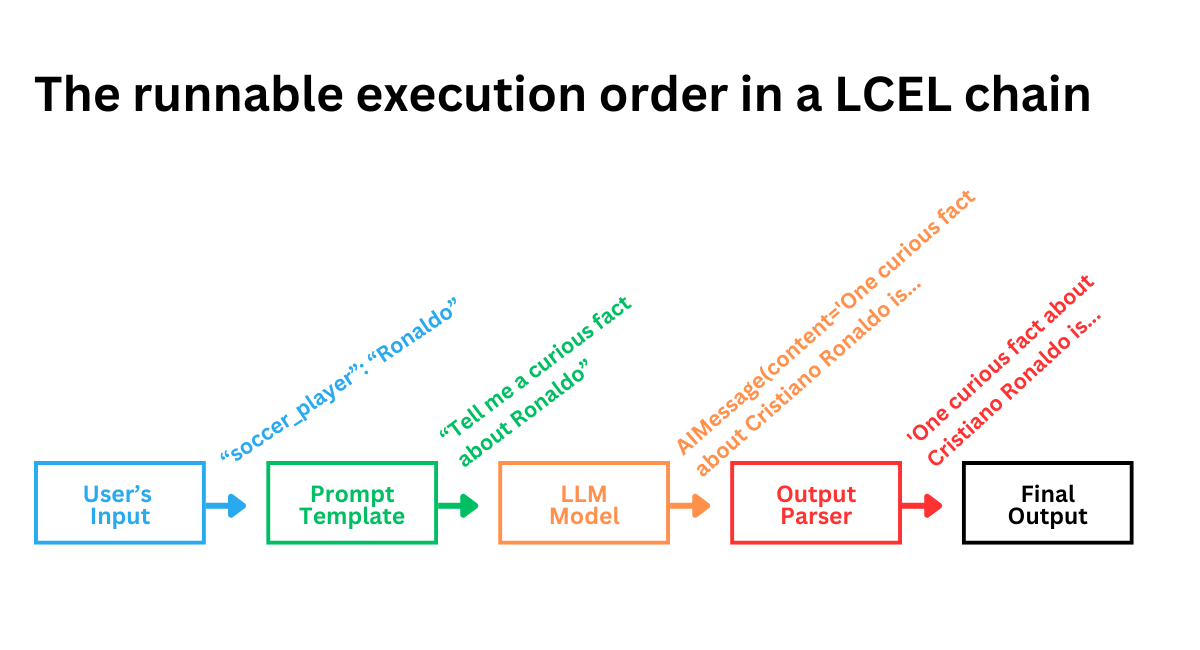

In [114]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

### Legacy Chain (Old ways)

In [115]:
from langchain.chains import LLMChain

prompt = ChatPromptTemplate.from_template("tell me a fact about {soccer_player}")

output_parser = StrOutputParser()

model = ChatOllama(
    model='llama3',
    temperature= 0.5
    )

traditional_chain = LLMChain(
    llm=model,
    prompt=prompt
)

traditional_chain.predict(soccer_player="Maradona")

'Here\'s one:\n\nDiego Maradona scored the "Hand of God" goal in the 1986 World Cup quarterfinals against England, which was a controversial and iconic moment in football history. What many people don\'t know is that Maradona had actually punched the ball into the net with his hand, rather than using his head or foot as he initially claimed. The referee didn\'t see it, but it\'s widely regarded as one of the most notorious cases of cheating in World Cup history!'

### New LCEL Chain 
* The "pipe" operator `|` is the main element of the LCEL chains.
* The order (left to right) of the elements in a LCEL chain matters.
* An LCEL Chain is a Sequence of Runnables.

In [116]:
chain = prompt | model | output_parser

chain.invoke({"soccer_player": "Lionel Messi"})

"Here's one:\n\nLionel Messi has won the Ballon d'Or award a record-breaking seven times (2009, 2010, 2011, 2012, 2015, 2016, and 2019). He is widely regarded as one of the greatest soccer players of all time!"

* All the components of the chain are Runnables.
* **When we write chain.invoke() we are using invoke with all the componentes of the chain in an orderly manner**:
    * First, we apply .invoke() with the user input to the prompt template.
    * Then, with the completed prompt, we apply .invoke() to the model.
    * And finally, we apply .invoke() to the output parser with the output of the model.
* IMPORTANT: the order of operations in a chain matters. If you try to execute the previous chain with the components in different order, the chain will fail.

And now let's replicate this process without using the LCEL chain

### Without LCEL Chain

In [117]:
prompt.invoke({"soccer_player": "Michael Ballack"})

ChatPromptValue(messages=[HumanMessage(content='tell me a fact about Michael Ballack')])

In [118]:
model.invoke(prompt.invoke({"soccer_player": "Mike Tyson"}))

AIMessage(content="Here's one:\n\nMike Tyson was the youngest heavyweight champion in history at the time, winning the title at just 20 years old in 1986. He defeated Trevor Berbick by unanimous decision to become the new WBC heavyweight champion of the world.", response_metadata={'model': 'llama3', 'created_at': '2024-08-27T11:25:46.561314159Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 1159211990, 'load_duration': 17436654, 'prompt_eval_count': 17, 'prompt_eval_duration': 22613000, 'eval_count': 53, 'eval_duration': 1076141000}, id='run-d1b84f5f-80fe-49dc-948d-267906aa4640-0')

In [119]:
StrOutputParser().invoke(model.invoke(prompt.invoke({"soccer_player": "Mike Tyson"})))

"Here's one:\n\nMike Tyson was the youngest heavyweight champion in history at the time, winning the title at just 20 years old when he defeated Trevor Berbick on February 22, 1986."

### Runnables

* Remember:
    * An LCEL Chain is a Sequence of Runnables.
    * Almost any component in LangChain (prompts, models, output parsers, etc) can be used as a Runnable.
    * Runnables can be chained together using the pipe operator `|`. The resulting chains of runnables are also runnables themselves.
    * The order (left to right) of the elements in a LCEL chain matters.

LCEL Chains/Runnables are used with:
* chain.invoke(): call the chain on an input.
* chain.stream(): call the chain on an input and stream back chunks of the response.
* chain.batch(): call the chain on a list of inputs.

In [120]:
prompt = ChatPromptTemplate.from_template("Tell me one sentence about {politician}.")
chain = prompt | model

In [121]:
# invoke 
chain.invoke({"politician": "Churchill"})

AIMessage(content='Winston Churchill was the Prime Minister of the United Kingdom during World War II, leading Britain to victory and delivering famous speeches such as "We shall fight on the beaches" and "Never give in."', response_metadata={'model': 'llama3', 'created_at': '2024-08-27T11:25:48.447532541Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 918951498, 'load_duration': 17402637, 'prompt_eval_count': 17, 'prompt_eval_duration': 26628000, 'eval_count': 41, 'eval_duration': 826282000}, id='run-f67062f9-d386-4897-b824-a95d9be425b0-0')

In [122]:
# stream
for s in chain.stream({"politician": "Jokowi"}):
    print(s.content, end="", flush=True)

Joko Widodo, commonly known as Jokowi, is the current President of Indonesia, serving since 2014 and previously serving as the Mayor of Surabaya from 2002 to 2012.

In [123]:
# batch
chain.batch([{"politician": "Lenin"}, {"politician": "Stalin"}])

[AIMessage(content="Vladimir Lenin was a Russian revolutionary and politician who served as the first head of government of Soviet Russia from 1918 to 1924, leading the Bolsheviks to victory in the October Revolution and establishing the world's first socialist state.", response_metadata={'model': 'llama3', 'created_at': '2024-08-27T11:25:50.661527781Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 1221794023, 'load_duration': 58392435, 'prompt_eval_count': 17, 'prompt_eval_duration': 29421000, 'eval_count': 50, 'eval_duration': 1089468000}, id='run-26f9b8e7-7b20-49ec-9373-46f8429e892c-0'),
 AIMessage(content='Joseph Stalin was the Soviet leader who ruled the USSR from 1922 to 1953, during which time he implemented a series of radical policies that led to widespread famine and repression, resulting in an estimated 20-40 million deaths.', response_metadata={'model': 'llama3', 'created_at': '2024-08-27T11:25:50.555626779Z', 'mess

LCEL Chains/Runnables can be also used asynchronously:
* chain.ainvoke(): call the chain on an input.
* chain.astream(): call the chain on an input and stream back chunks of the response.
* chain.abatch(): call the chain on a list of inputs.

## B. Main built-in LCEL Runnables

- RunnablePassthrough
- RunnableLambda
- RunnableParallel 

###  RunnablePassthrough

* It does not do anything to the input data.
* Let's see it in a very simple example: a chain with just RunnablePassthrough() will output the original input without any modification.

In [124]:
from langchain_core.runnables import RunnablePassthrough

chain = RunnablePassthrough()
chain.invoke("Michael Jackson")

'Michael Jackson'

###  RunnableLambda

* To use a custom function inside a LCEL chain we need to wrap it up with RunnableLambda.
* Let's define a very simple function to create Russian lastnames:

In [125]:
def russian_lastname(name: str) -> str:
    return f"{name}ovich"

In [126]:
from langchain_core.runnables import RunnableLambda

chain = RunnablePassthrough() | RunnableLambda(russian_lastname)

chain.invoke("John")

'Johnovich'

###  RunnableParallel
* We will use RunnableParallel() for running tasks in parallel.
* This is probably the most important and most useful Runnable from LangChain.
* In the following chain, RunnableParallel is going to run these two tasks in parallel:
    * operation_a will use RunnablePassthrough.
    * operation_b will use RunnableLambda with the russian_lastname function.

In [127]:
from langchain_core.runnables import RunnableParallel

chain = RunnableParallel(
    {
        "operation_a": RunnablePassthrough(),
        "operation_b": RunnableLambda(russian_lastname)
    }
)

chain.invoke("Abraham")

{'operation_a': 'Abraham', 'operation_b': 'Abrahamovich'}

In [128]:
# Instead of using RunnableLambda, now we are going to use a lambda function 
# and we will invoke the chain with two inputs:

chain = RunnableParallel(
    {
        "operation_a": RunnablePassthrough(),
        "soccer_player": lambda x: x["name"]+"ovich"
    }
)

chain.invoke({
    "name1": "Jordan",
    "name": "Abram"
})

# See how the lambda function is taking the "name" input.

{'operation_a': {'name1': 'Jordan', 'name': 'Abram'},
 'soccer_player': 'Abramovich'}

Important: the syntax of RunnableParallel can have several variations.
* When composing a RunnableParallel with another Runnable you do not need to wrap it up in the RunnableParallel class. Inside a chain, the next three syntaxs are equivalent:
    * `RunnableParallel({"context": retriever, "question": RunnablePassthrough()})`
    * `RunnableParallel(context=retriever, question=RunnablePassthrough())`
    * `{"context": retriever, "question": RunnablePassthrough()}`

We can add more Runnables to the chain

In [129]:
# In the following example, the prompt Runnable will take the output of the RunnableParallel:

prompt = ChatPromptTemplate.from_template("tell me a curious fact about {soccer_player}")
output_parser = StrOutputParser()

def russian_lastname_from_dictionary(person):
    return person["name"] + "ovich"

chain = RunnableParallel(
    {
        "operation_a": RunnablePassthrough(),
        "soccer_player": RunnableLambda(russian_lastname_from_dictionary),
        "operation_c": RunnablePassthrough(),
    }
) | prompt | model | output_parser

chain.invoke({
    "name1": "Jordam",
    "name": "Abram"
})

# As you saw, the prompt Runnable took "Abramovich", 
# the output of the RunnableParallel, as the value for the "soccer_player" variable.

"A curious fact about Roman Abramovich!\n\nHere's one: Did you know that Abramovich, the billionaire owner of Chelsea Football Club, is also a passionate collector of rare and unusual things? In 2008, he purchased the world's largest privately owned yacht, the Eclipse, for over $500 million. But here's the curious part: The Eclipse has a hidden submarine docked on its deck! Yes, you read that right - Abramovich has his own personal submarine, capable of carrying up to 18 people, which can be deployed from the ship.\n\nThis incredible vessel is said to have been designed by naval architect Frank Mulder and features advanced technology, including a mini-submarine, a helicopter pad, and even a missile defense system. Talk about taking your yacht game to the next level!"

Let's see a more advanced use of RunnableParallel

In [131]:
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 187.9 MB/s eta 0:00:0000:0100:01


In [132]:
from langchain_community.vectorstores import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough, RunnableParallel
from langchain_community.embeddings import OllamaEmbeddings


vectorstore = FAISS.from_texts(
    ["""
Michael Gerard Tyson, also known as Mike Tyson (born June 30, 1966, New York City, United States), is a professional boxer and former heavyweight champion. His promising career was hindered by various criminal cases.
Internationally, he is commonly referred to as "Iron Mike", referring to his strong physique. Other media outlets often call him "The Baddest Man on Earth", referencing his rough behavior both in and out of the boxing ring.
In Indonesia, however, Tyson is more affectionately known as "Si Leher Beton" (Concrete Neck), which refers to the extraordinary size of his neck during its peak, making it seem incredibly sturdy.
"""],
      embedding=OllamaEmbeddings(model='llama3')
)

retriever = vectorstore.as_retriever()

template = """Answer the question based only on the following context:
{context}

Question: {question}
"""

prompt = ChatPromptTemplate.from_template(template)

model = ChatOllama(model='llama3',temperature= 0.2)

retrieval_chain = (
    RunnableParallel({"context": retriever, "question": RunnablePassthrough()})
    | prompt
    | model
    | StrOutputParser()
)

retrieval_chain.invoke("What is 'si leher beton'?")

'According to the context, "Si Leher Beton" is a nickname for Mike Tyson in Indonesia, referring to the extraordinary size of his neck.'

Using itemgetter with RunnableParallel
* When you are calling the LLM with several different input variables.

In [133]:
from operator import itemgetter

from langchain_community.vectorstores import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_community.embeddings import OllamaEmbeddings

model = ChatOllama(model='llama3',temperature= 0.2)

vectorstore = FAISS.from_texts(
    ["""
Michael Gerard Tyson, also known as Mike Tyson (born June 30, 1966, New York City, United States), is a professional boxer and former heavyweight champion. His promising career was hindered by various criminal cases.
Internationally, he is commonly referred to as "Iron Mike", referring to his strong physique. Other media outlets often call him "The Baddest Man on Earth", referencing his rough behavior both in and out of the boxing ring.
In Indonesia, however, Tyson is more affectionately known as "Si Leher Beton" (Concrete Neck), which refers to the extraordinary size of his neck during its peak, making it seem incredibly sturdy.
"""], embedding=OllamaEmbeddings(model='llama3')
)
retriever = vectorstore.as_retriever()

template = """Answer the question based only on the following context:
{context}

Question: {question}

Answer in the following language: {language} 
do not use english when answer the question
"""

prompt = ChatPromptTemplate.from_template(template)

chain = (
    {
        "context": itemgetter("question") | retriever,
        "question": itemgetter("question"),
        "language": itemgetter("language"),
    }
    | prompt
    | model
    | StrOutputParser()
)

chain.invoke(
    {"question": "when was Mike Tyson born?", 
     "language": "Javanese"})

'Dénéngé wong, tanggal 30 Juni 1966.'

## C. Main built-in LCEL functions for runnables
- .bind
- .assign()

### .bind()

* Use of .bind() to add arguments to a Runnable in a LCEL Chain
* For example, we can add an argument to stop the model response when it reaches the word "Ronaldo":

In [134]:
prompt = ChatPromptTemplate.from_template("tell me a curious fact about {soccer_player}")
model = ChatOllama(model='llama3',temperature= 0.2)
output_parser = StrOutputParser()

chain = prompt | model.bind(stop=["Ronaldo"]) | output_parser
chain.invoke({"soccer_player": "Ronaldo"})

"Here's one:\n\nDid you know that Cristiano"

### .assign()

* he assign() function allows adding keys to a chain
* Example: we will create a key name "operation_b" assigned to a custom function with a RunnableLambda.
* We will start with a very basic chain with just RunnablePassthrough:

In [135]:
from langchain_core.runnables import RunnableParallel, RunnablePassthrough, RunnableLambda

chain = RunnableParallel({"original_input": RunnablePassthrough()})
chain.invoke("whatever")

{'original_input': 'whatever'}

* As you can see, right now this chain is only assigning the user input to the "original_input" variable.
* Let's now add the new key "uppercase" with the assign function.
* In the new "uppercase" key, we will use a RunnableLambda with the custom function named `make_uppercase`

In [136]:
def make_uppercase(arg):
    return arg["original_input"].upper()

chain = RunnableParallel({"original_input": RunnablePassthrough()}).assign(uppercase=RunnableLambda(make_uppercase))

chain.invoke("whatever")

{'original_input': 'whatever', 'uppercase': 'WHATEVER'}

* As you can see, the output of the chain has now 2 keys: original_input and uppercase.
* In the uppercase key, we can see that the `make_uppercase` function has been applied to the user input.

## D. Main Operations with LCEL Chains
* Chaining runnables, coercion.
* Multiple chains.
* Nested chains.
* Fallback for chains.

### Chaining Runnables
* Remember: almost any component in LangChain (prompts, models, output parsers, etc) can be used as a Runnable.
* **Runnables can be chained together using the pipe operator `|`. The resulting chains of runnables are also runnables themselves**.

In [137]:
prompt = ChatPromptTemplate.from_template("tell me a sentence about {politician}")

model = ChatOllama(model='llama3',temperature= 0.2)

chain = prompt | model | StrOutputParser()

chain.invoke("Chamberlain")

'Winston Churchill famously described Neville Chamberlain\'s appeasement policy towards Nazi Germany as "an act of surrender" in his speech to the House of Commons on May 12, 1940.'

#### Coercion: combine a chain (which is a Runnable) with other Runnables to create a new chain.
* See how in the `composed_chain` we are including the previous `chain`:

In [138]:
historian_prompt = ChatPromptTemplate.from_template("Was {politician} positive for Humanity?")

composed_chain = {"politician": chain} | historian_prompt | model | StrOutputParser()

composed_chain.invoke({"politician": "Lincoln"})

"What a great question!\n\nAbraham Lincoln's issuance of the Emancipation Proclamation on January 1, 1863, was indeed a significant and historic event that had far-reaching consequences for humanity.\n\nHere are some reasons why:\n\n1. **End of slavery**: The Emancipation Proclamation declared freedom for all slaves in Confederate territory, effectively ending the institution of slavery in those areas. This was a crucial step towards abolishing slavery altogether.\n2. **Advancement of human rights**: By issuing the proclamation, Lincoln took a bold stance against the injustice and cruelty of slavery, recognizing that all people are created equal and deserve to be free.\n3. **Unifying the nation**: The Emancipation Proclamation helped to unify the North and West behind the Union cause, as many abolitionists and anti-slavery advocates saw it as a crucial step towards ending the Civil War and preserving the Union.\n4. **Inspiring future reforms**: Lincoln's proclamation inspired further e

In [139]:
composed_chain.invoke({"politician": "Attila"})

'What a complex question!\n\nAttila the Hun is often regarded as one of the most feared and successful warlords in history, leading the Hunnic Empire to conquer vast territories across Europe and Asia during his reign from 434 to 453 AD. However, whether he was "positive" for humanity is open to interpretation.\n\nHere are some arguments for both sides:\n\n**Arguments for Attila being positive for humanity:**\n\n1. **Unification of fragmented regions**: Attila\'s conquests brought together various tribes and kingdoms under a single rule, creating a sense of unity and stability in the region.\n2. **Economic growth**: The Hunnic Empire\'s expansion led to increased trade and commerce, which benefited many cities and communities along the trade routes.\n3. **Cultural exchange**: Attila\'s empire was known for its cultural diversity, with influences from various ethnic groups. This exchange of ideas, art, and technology might have contributed to the development of European culture.\n\n**Ar

* **Functions can also be included in Runnables**:

In [140]:
composed_chain_with_lambda = (
    chain
    | (lambda input: {"politician": input})
    | historian_prompt
    | model
    | StrOutputParser()
)

composed_chain_with_lambda.invoke({"politician": "Robespierre"})

"What a complex and intriguing question!\n\nMaximilien Robespierre is indeed considered one of the most influential figures of the French Revolution. While he was initially a passionate advocate for the execution of King Louis XVI and Queen Marie Antoinette, his radical policies and ruthless tactics ultimately led to his downfall and death by guillotine in 1794.\n\nAs for whether Robespierre was positive or negative for humanity, it's essential to consider both sides of his legacy:\n\n**Positive aspects:**\n\n1. **Advocate for the common people**: Robespierre was a champion of the sans-culottes, the working-class and poor people who were the backbone of the French Revolution. He fought tirelessly for their rights and interests.\n2. **Radical reforms**: During his time in power (July 1793 to July 1794), Robespierre implemented significant social and economic reforms, such as the abolition of feudalism, the establishment of a secular education system, and the creation of a national bank.

* If you include a function in a chain, it can interfere with operations like streaming. You can learn more about this [here](https://python.langchain.com/v0.1/docs/expression_language/primitives/functions/).

### Multiple chains

In [141]:
from operator import itemgetter

from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate


prompt1 = ChatPromptTemplate.from_template("what is the country {politician} is from?")
prompt2 = ChatPromptTemplate.from_template(
    "what continent is the country {country} in? respond in {language}"
)

model = ChatOllama(model='llama3',temperature= 0.2)

chain1 = prompt1 | model | StrOutputParser()

chain2 = (
    {"country": chain1, "language": itemgetter("language")}
    | prompt2
    | model
    | StrOutputParser()
)

chain2.invoke({"politician": "Miterrand", "language": "French"})

"Je suis désolé pour la erreur de nom ! François Mitterrand est effectivement un homme politique français.\n\nLa réponse à votre question est : l'Europe.\n\nEn français : La réponse à votre question est : l'Europe."

### Nested chains

In [142]:
prompt = ChatPromptTemplate.from_template("tell me a curious fact about {soccer_player}")

output_parser = StrOutputParser()

def russian_lastname_from_dictionary(person):
    return person["name"] + "ovich"

chain = RunnableParallel(
    {
        "soccer_player": RunnablePassthrough() 
        | RunnableLambda(russian_lastname_from_dictionary), 
        "operation_c": RunnablePassthrough()
    }
) | prompt | model | output_parser

chain.invoke({
    "name1": "Jordam",
    "name": "Abram"
})

"A curious fact about Roman Abramovich!\n\nHere's one: Did you know that Abramovich, the billionaire owner of Chelsea FC and other business ventures, is also a licensed pilot and owns a private jet fleet? In fact, he has a special permit to land his planes at any airport in the UK, including those with restricted access. This privilege was granted due to his high-profile status and security concerns.\n\nAbramovich's love for flying dates back to his childhood, when he would often take small planes out for joyrides. He eventually earned his pilot's license and has since acquired a fleet of private jets, including a Gulfstream G650ER, which is one of the most luxurious and expensive business jets in the world.\n\nThis fact might seem unrelated to his business or football endeavors, but it speaks to Abramovich's adventurous spirit and willingness to push boundaries. Who knows? Maybe he'll even take the Chelsea FC team on a private jet for their next away game!"

### Fallback for Chains
* When working with language models, you may often encounter issues from the underlying APIs, whether these be rate limiting or downtime. Therefore, as you go to move your LLM applications into production it becomes more and more important to safeguard against these. That's why LangChain introduced the concept of fallbacks.
* A fallback is an alternative plan that may be used in an emergency.
* Fallbacks can be applied not only on the LLM level but on the whole runnable level. This is important because often times different models require different prompts. So if your call to OpenAI fails, you don't just want to send the same prompt to Anthropic - you probably want to use a different prompt template and send a different version there.
* We can create fallbacks for LCEL chains. Here we do that with two different models: ChatOpenAI (with a bad model name to easily create a chain that will error) and then normal OpenAI (which does not use a chat model). Because OpenAI is NOT a chat model, you likely want a different prompt.

In [143]:
chat_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You're a funny assistant who always includes a joke in your response",
        ),
        ("human", "Who is the best {sport} player worldwide?"),
    ]
)
# Here we're going to use a bad model name to easily create a chain that will error
chat_model = ChatOllama(model='llama_blablabla',temperature= 0.2)

bad_chain = chat_prompt | chat_model | StrOutputParser()

In [144]:
# Now lets create a chain with the normal model

prompt_template = """Instructions: You're a funny assistant who always includes a joke in your response.

Question: Who is the best {sport} player worldwide?"""

prompt = PromptTemplate.from_template(prompt_template)

llm = ChatOllama(model='llama3',temperature= 0.2)

good_chain = prompt | llm

In [145]:
# We can now create a final chain which combines the two
chain = bad_chain.with_fallbacks([good_chain])

chain.invoke({"sport": "soccer"})

AIMessage(content='That\'s an easy one!\n\nAccording to most people, it\'s Lionel Messi. But let me tell you, I\'ve seen some pretty impressive moves on the field... and off! Why did the soccer ball go to therapy? Because it was feeling a little "deflated"!\n\nBut seriously, Messi is widely regarded as one of the greatest soccer players of all time, with an impressive record of goals and awards. He\'s won numerous titles with Barcelona and the Argentine national team, including six Ballon d\'Or awards.\n\nSo, if you\'re looking for some top-notch soccer skills, Messi is your guy!', response_metadata={'model': 'llama3', 'created_at': '2024-08-27T11:27:01.578816016Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 2724498317, 'load_duration': 16427064, 'prompt_eval_count': 36, 'prompt_eval_duration': 28974000, 'eval_count': 124, 'eval_duration': 2635373000}, id='run-a3778b5e-4982-476c-a4f8-3bc28355a749-0')

# 8. LangChain Document Loaders

## A. Text File

In [154]:
pwd

'/teamspace/studios/this_studio/langchain-ollama'

In [155]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader("/teamspace/studios/this_studio/langchain-ollama/王冉6_15.txt")

loaded_data = loader.load()

In [156]:
loaded_data

[Document(metadata={'source': '/teamspace/studios/this_studio/langchain-ollama/王冉6_15.txt'}, page_content='2024-03-20 20:05:45 你已添加了若曦，现在可以开始聊天了。\n\n2024-03-20 20:05:55 未冉之芊\nbz余明辉\n\n2024-03-20 20:17:00 王冉6_15\n[表情包]\n\n2024-03-20 20:19:29 未冉之芊\n[表情包]\n\n2024-03-20 23:03:14 王冉6_15\n你们学院有歌手大赛嘛[疑问]\n\n2024-03-20 23:03:34 未冉之芊\n好像有的\n\n2024-03-20 23:03:47 王冉6_15\n哦哦搜嘎\n\n2024-03-20 23:04:03 未冉之芊\n周五晚上6点\n\n2024-03-20 23:04:11 王冉6_15\n我们也是\n\n2024-03-20 23:04:19 王冉6_15\n6点多\n\n2024-03-20 23:04:38 王冉6_15\n我这次主持嘿嘿\n\n2024-03-20 23:04:47 未冉之芊\n[表情包]\n\n2024-03-20 23:04:55 王冉6_15\n[表情包]\n\n2024-03-20 23:05:04 王冉6_15\n你怎么这么多可爱表情包\n\n2024-03-20 23:05:06 未冉之芊\n你是什么学院呀\n\n2024-03-20 23:05:16 未冉之芊\n[表情包]\n\n2024-03-20 23:05:17 王冉6_15\n商院嘟\n\n2024-03-20 23:05:25 未冉之芊\n我qq表情包比较多\n\n2024-03-20 23:05:35 未冉之芊\n微信只有一点\n\n2024-03-20 23:05:51 王冉6_15\n搜嘎[旺柴]\n\n2024-03-20 23:06:07 王冉6_15\n嘿嘿\n\n2024-03-20 23:07:48 未冉之芊\n你好厉害呀，当主持人我都不敢想\n\n2024-03-20 23:08:10 王冉6_15\n没有没有\n\n2024-03-20 23:08:24 王冉6_15\n主要不是

## B. PDF File

In [186]:
!pwd
!ls

/teamspace/studios/this_studio/langchain-ollama
17、实用性写作.pdf				    memory.pkl
langchain-v0-2-notebook-snippet-using-ollama.ipynb  王冉6_15.txt


In [192]:
!pip install PyMuPDF 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 162.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 190.4 MB/s eta 0:00:00


In [193]:
from langchain_core.document_loaders.base import Document
import fitz  # PyMuPDF

class PyMuPDFLoader:
    def __init__(self, file_path):
        self.file_path = file_path
    
    def load(self):
        document = fitz.open(self.file_path)
        docs = []
        
        for page_num in range(len(document)):
            page = document.load_page(page_num)
            text = page.get_text()
            docs.append(Document(page_content=text))
        
        return docs
    
    def load_and_split(self, text_splitter):
        docs = self.load()
        return text_splitter.split_documents(docs)

# 使用自定义的 PyMuPDFLoader
loader = PyMuPDFLoader('/teamspace/studios/this_studio/langchain-ollama/17实用性写作.pdf')
loaded_data = loader.load_and_split(text_splitter)


In [194]:
[i.replace(' ','') for i in loaded_data[0].page_content.split('\n')]

['英语六级作文模板大全：实用性写作',
 '',
 'Youraddress',
 '',
 'Month,Date,year',
 '',
 "Receiver'saddress",
 '',
 'Dear...,',
 '',
 'Iamextremelypleasedtohearfromyou./toseeyouradvertisementforthepositionin....',
 'AndIwouldliketowritealettertotellyouthat.../IamconfidentthatIamsuitableforthekind',
 'ofthejobyouareadvertising.',
 '',
 '.../IfeelIamcompetenttomeettherequirementsyouhavelisted.Ontheonehand,....On',
 'theotherhand,....Iamenclosingmyresumeforyourkindconsiderationandreference.',
 '',
 'Ishallbemuchobligedifyouwilloffermeapreciousopportunitytoaninterview.Iwill',
 'greatlyappreciatearesponsefromyouatyourearliestconvenience/Iamlookingforwardto',
 'yourrepliesatyourearliestconvenience.',
 '',
 'Bestregardsforyourhealthandsuccess.',
 '',
 'Sincerelyyours,',
 '',
 'XXX']

## C. CSV File 

In [195]:
from langchain_community.document_loaders import CSVLoader

loader = CSVLoader('/teamspace/studios/this_studio/langchain-ollama/源数据.csv')

loaded_data = loader.load()

In [196]:
loaded_data[0]

Document(metadata={'source': '/teamspace/studios/this_studio/langchain-ollama/源数据.csv', 'row': 0}, page_content='\ufeff用户名: pinghuang\n性别: 男\n身份证号: 53032219850817****\n登录地区: 重庆市\n登录设备: Android\n消费额: 747.5')

## D. HTML File 

In [197]:
from langchain_community.document_loaders import BSHTMLLoader

loader = CSVLoader('/teamspace/studios/this_studio/langchain-ollama/王冉6_15.html')

loaded_data = loader.load()

In [198]:
loaded_data

[Document(metadata={'source': '/teamspace/studios/this_studio/langchain-ollama/王冉6_15.html', 'row': 0}, page_content='<!DOCTYPE html>: <html lang="zh-CN">'),
 Document(metadata={'source': '/teamspace/studios/this_studio/langchain-ollama/王冉6_15.html', 'row': 1}, page_content='<!DOCTYPE html>: <head>'),
 Document(metadata={'source': '/teamspace/studios/this_studio/langchain-ollama/王冉6_15.html', 'row': 2}, page_content='<!DOCTYPE html>: <meta charset="UTF-8">'),
 Document(metadata={'source': '/teamspace/studios/this_studio/langchain-ollama/王冉6_15.html', 'row': 3}, page_content='<!DOCTYPE html>: <meta name="viewport" content="width=device-width\nNone: initial-scale=1.0">'),
 Document(metadata={'source': '/teamspace/studios/this_studio/langchain-ollama/王冉6_15.html', 'row': 4}, page_content='<!DOCTYPE html>: <meta name="referrer" content="no-referrer" />'),
 Document(metadata={'source': '/teamspace/studios/this_studio/langchain-ollama/王冉6_15.html', 'row': 5}, page_content='<!DOCTYPE html>: <

## E. Wikipedia Page (and asking questions abouut it)

In [159]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=8775d625e765d8d4a5111add46e87f3561b23f0f5ab2fa2c0433c55cfbc710b3
  Stored in directory: /teamspace/studios/this_studio/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [160]:
from langchain_community.document_loaders import WikipediaLoader

In [161]:
loader = WikipediaLoader(query='Surveyor Indonesia', load_max_docs=1, lang='id')
loaded_data = loader.load()[0].page_content
loaded_data

'PT Surveyor Indonesia adalah anggota Holding IDSurvey yang menyediakan berbagai macam jasa survei. Melalui anak usahanya, perusahaan ini juga menyediakan jasa EPC. Untuk mendukung kegiatan bisnisnya, hingga tahun 2020, perusahaan ini memiliki sebelas kantor cabang yang tersebar di seluruh Indonesia dan satu kantor perwakilan di Singapura.\n\n\n== Sejarah ==\nPerusahaan ini didirikan pada tanggal 1 Agustus 1991 sebagai sebuah perusahaan patungan antara pemerintah Indonesia, Sucofindo, dan Societe Generale de Surveillance, untuk menyediakan jasa pemeriksaan pra-pengapalan guna memastikan kelayakan peralatan dari seluruh dunia sebelum dikirim ke Indonesia. Pada tahun 1997, karena tidak lagi ditugaskan oleh pemerintah untuk menyediakan jasa pemeriksaan pra-pengapalan, perusahaan ini pun mulai beralih menyediakan jasa pemeriksaan teknis, survei, pengkajian, penilaian, pengawasan, audit, dan konsultansi. Perusahaan ini fokus memberikan layanan untuk sejumlah sektor, yakni industri, perdagan

In [162]:
from langchain_core.prompts import ChatPromptTemplate

model = ChatOllama(
    model='llama3',
    temperature= 0.2
    )

chat_template = ChatPromptTemplate.from_messages(
    [
        ("human", "Answer this {question}, here is some extra {context}"),
    ]
)

messages = chat_template.format_messages(
    # question="Kapan Surveyor Indonesia didirikan?",
    question="apa yang terjadi di tahun 1991?",
    context=loaded_data
)

response = model.invoke(messages)

In [163]:
response 

AIMessage(content='Berikut apa yang terjadi di tahun 1991:\n\n* PT Surveyor Indonesia didirikan pada tanggal 1 Agustus 1991 sebagai sebuah perusahaan patungan antara pemerintah Indonesia, Sucofindo, dan Societe Generale de Surveillance. Perusahaan ini awalnya menyediakan jasa pemeriksaan pra-pengapalan guna memastikan kelayakan peralatan dari seluruh dunia sebelum dikirim ke Indonesia.', response_metadata={'model': 'llama3', 'created_at': '2024-08-27T11:32:20.428541658Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 4842169563, 'load_duration': 2408206443, 'prompt_eval_count': 577, 'prompt_eval_duration': 245058000, 'eval_count': 103, 'eval_duration': 2187635000}, id='run-6aac8837-411b-4373-98de-3a411651ae03-0')

## F. Simple Retrieval Augmented Generation (RAG)

What if the loaded data is too large? We will use RAG.

* When you load a document, you end up with strings. Sometimes the strings will be too large to fit into the context window. In those occassions we will use the RAG technique:
    * Split document in small chunks.
    * Transform text chunks in numeric chunks (embeddings).
    * Load embeddings to a vector database (aka vector store).
    * Load question and retrieve the most relevant embeddings to respond it.
    * Sent the embeddings to the LLM to format the response properly.

In [164]:
# data 
loader = WikipediaLoader(query='Surveyor Indonesia', load_max_docs=1, lang='id')
loaded_data = loader.load()[0].page_content
loaded_data

'PT Surveyor Indonesia adalah anggota Holding IDSurvey yang menyediakan berbagai macam jasa survei. Melalui anak usahanya, perusahaan ini juga menyediakan jasa EPC. Untuk mendukung kegiatan bisnisnya, hingga tahun 2020, perusahaan ini memiliki sebelas kantor cabang yang tersebar di seluruh Indonesia dan satu kantor perwakilan di Singapura.\n\n\n== Sejarah ==\nPerusahaan ini didirikan pada tanggal 1 Agustus 1991 sebagai sebuah perusahaan patungan antara pemerintah Indonesia, Sucofindo, dan Societe Generale de Surveillance, untuk menyediakan jasa pemeriksaan pra-pengapalan guna memastikan kelayakan peralatan dari seluruh dunia sebelum dikirim ke Indonesia. Pada tahun 1997, karena tidak lagi ditugaskan oleh pemerintah untuk menyediakan jasa pemeriksaan pra-pengapalan, perusahaan ini pun mulai beralih menyediakan jasa pemeriksaan teknis, survei, pengkajian, penilaian, pengawasan, audit, dan konsultansi. Perusahaan ini fokus memberikan layanan untuk sejumlah sektor, yakni industri, perdagan

In [165]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text = loaded_data

# Dictionary of replacements
replacements = {
    '==': '',
    '\n': ''
}

# Replace each character in the dictionary
for old, new in replacements.items():
    text = text.replace(old, new)



# text splitter
text_splitter = RecursiveCharacterTextSplitter(

    chunk_size=545,
    chunk_overlap=50,
    length_function=len,
    # separators=[' '],
    is_separator_regex=False,
)

texts = text_splitter.create_documents([text])
texts

[Document(page_content='PT Surveyor Indonesia adalah anggota Holding IDSurvey yang menyediakan berbagai macam jasa survei. Melalui anak usahanya, perusahaan ini juga menyediakan jasa EPC. Untuk mendukung kegiatan bisnisnya, hingga tahun 2020, perusahaan ini memiliki sebelas kantor cabang yang tersebar di seluruh Indonesia dan satu kantor perwakilan di Singapura. Sejarah Perusahaan ini didirikan pada tanggal 1 Agustus 1991 sebagai sebuah perusahaan patungan antara pemerintah Indonesia, Sucofindo, dan Societe Generale de Surveillance, untuk menyediakan jasa'),
 Document(page_content='Generale de Surveillance, untuk menyediakan jasa pemeriksaan pra-pengapalan guna memastikan kelayakan peralatan dari seluruh dunia sebelum dikirim ke Indonesia. Pada tahun 1997, karena tidak lagi ditugaskan oleh pemerintah untuk menyediakan jasa pemeriksaan pra-pengapalan, perusahaan ini pun mulai beralih menyediakan jasa pemeriksaan teknis, survei, pengkajian, penilaian, pengawasan, audit, dan konsultansi. 

In [166]:
for i in texts:
    print(len(i.page_content))

537
543
542
385


In [167]:
# embedding 
from langchain_community.embeddings import OllamaEmbeddings

embeddings_model = OllamaEmbeddings(model='llama3')
embeddings = embeddings_model.embed_documents(texts=texts)
print(len(embeddings))

4


In [184]:
!pip install langchain_chroma

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 155.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 116.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 171.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 148.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 182.5 MB/s eta 0:00:00
  Created wheel for pypika: filename=PyPika-0.48.9-py2.py3-none-any.whl size=53724 sha256=bc99685e9113f410195c9b8d86c4c125820d7a3077c502046fdd36db96a0de7e
  Stored in directory: /teamspace/studios/this_studio/.cache/pip/wheels/e1/26/51/d0bffb3d2fd82256676d7ad3003faea3bd6dddc9577af665f4
Successfully built pypika


In [200]:
from langchain_core.document_loaders.base import Document
from langchain_chroma import Chroma
from langchain.embeddings import OllamaEmbeddings

# 假设 texts 是一个包含你所有文本的字符串列表
texts = [
    "This is the first document.",
    "This is the second document.",
    "What happened in 1997?",
    # 其他文本
]

# 将字符串列表转换为 Document 对象列表
documents = [Document(page_content=text) for text in texts]

# 创建 OllamaEmbeddings 实例
embedding = OllamaEmbeddings(model='llama3')

# 使用 Chroma 从 Document 对象列表创建向量数据库
vector_db = Chroma.from_documents(documents, embedding)

# 示例查询
question = "What happened in 1997?"
response = vector_db.similarity_search(question)
print(response)


Number of requested results 4 is greater than number of elements in index 3, updating n_results = 3


[Document(page_content='What happened in 1997?'), Document(page_content='This is the first document.'), Document(page_content='This is the second document.')]


In [202]:
# # vector databases: store and search embeddings
# from langchain_chroma import Chroma
# vector_db = Chroma.from_documents(texts, OllamaEmbeddings(model='llama3'))

# question = "What happened in 1997?"

# response = vector_db.similarity_search(question)
# response

## 这是失败的

In [ ]:
from langchain_community.vectorstores import FAISS
from langchain_core.runnables import RunnablePassthrough

embeddings_model = OllamaEmbeddings(model='llama3')
vector_db = FAISS.from_documents(documents=texts, embedding=embeddings_model)
retriever = vector_db.as_retriever()

template = """Answer the question based only on the following context:

{context}

Question: {question}
"""

prompt = ChatPromptTemplate.from_template(template)
model = ChatOllama(
    model='llama3',
    temperature= 0.2
    )
def format_docs(docs):
    return "\n\n".join([d.page_content for d in docs])

chain = (
    {"context": retriever | format_docs , "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)



In [ ]:
response = chain.invoke("Ada berapa kantor cabang yang Surveyor Indonesia miliki?")
response

In [171]:
response = chain.invoke("Kapan Surveyor Indonesia didirikan?")
response

'Surveyor Indonesia didirikan pada tanggal 1 Agustus 1991.'

# 9. LangChain Splitters

## A. RecursiveCharacterTextSplitter

In [172]:
story = """
ONCE UPON A TIME, IN A LAND OF COLOR AND MYSTERY, THERE EXISTED A MAGICAL RUBIK'S CUBE. THIS CUBE WAS NOT JUST ANY ORDINARY PUZZLE; IT WAS ENCHANTED WITH THE POWER TO BRING ORDER TO CHAOS. THE CUBE RESIDED IN A VIBRANT KINGDOM WHERE EVERYONE WAS INTRIGUED BY ITS COMPLEXITY.

ONE DAY, A YOUNG BOY NAMED MAX FOUND THE RUBIK'S CUBE WHILE EXPLORING THE FOREST. MAX WAS FASCINATED BY THE CUBE'S COLORS AND INTRICATE PATTERNS. WITH EACH TWIST AND TURN, HE FELT A CONNECTION TO THE CUBE, AS IF IT WAS CALLING OUT TO HIM TO SOLVE ITS MYSTERY.

DETERMINED, MAX SPENT DAYS AND NIGHTS WORKING ON THE CUBE. HE STUDIED ITS MOVEMENTS AND TRIED TO UNRAVEL ITS SECRETS. THE CUBE WAS A CHALLENGE, BUT MAX WAS PERSISTENT. HE BELIEVED THAT SOLVING IT WOULD REVEAL SOMETHING EXTRAORDINARY.

ONE FATEFUL EVENING, AS THE SUN SET AND THE STARS BEGAN TO TWINKLE, MAX MADE THE FINAL MOVE. CLICK! THE CUBE'S COLORS ALIGNED PERFECTLY. AT THAT MOMENT, A BRILLIANT LIGHT EMANATED FROM THE CUBE, SURROUNDING MAX IN A WARM GLOW.

TO HIS AMAZEMENT, THE RUBIK'S CUBE TRANSFORMED INTO A GATEWAY TO ANOTHER DIMENSION. MAX STEPPED THROUGH THE GATEWAY AND FOUND HIMSELF IN A LAND OF PURE IMAGINATION. EVERYTHING WAS POSSIBLE HERE, AND THE LAWS OF REALITY DID NOT APPLY. THE INHABITANTS OF THIS LAND WELCOMED MAX AS THEIR HERO.

THEY EXPLAINED THAT THE RUBIK'S CUBE WAS A KEY TO THEIR WORLD, A SYMBOL OF BALANCE AND HARMONY. ONLY A TRUE BELIEVER, SOMEONE WITH PATIENCE AND DEDICATION, COULD UNLOCK ITS POTENTIAL. MAX HAD PROVEN HIMSELF WORTHY AND WAS GRANTED THE TITLE OF "GUARDIAN OF THE CUBE."

FROM THAT DAY FORWARD, MAX USED HIS NEWFOUND KNOWLEDGE AND SKILLS TO HELP OTHERS SOLVE THEIR OWN PROBLEMS, BRINGING ORDER AND HARMONY TO BOTH WORLDS. THE RUBIK'S CUBE REMAINED A SYMBOL OF HIS JOURNEY, REMINDING EVERYONE THAT WITH PERSEVERANCE AND DETERMINATION, ANYTHING IS POSSIBLE.
"""

In [173]:
from langchain.schema import Document
doc = Document(story)
doc

Document(page_content='\nONCE UPON A TIME, IN A LAND OF COLOR AND MYSTERY, THERE EXISTED A MAGICAL RUBIK\'S CUBE. THIS CUBE WAS NOT JUST ANY ORDINARY PUZZLE; IT WAS ENCHANTED WITH THE POWER TO BRING ORDER TO CHAOS. THE CUBE RESIDED IN A VIBRANT KINGDOM WHERE EVERYONE WAS INTRIGUED BY ITS COMPLEXITY.\n\nONE DAY, A YOUNG BOY NAMED MAX FOUND THE RUBIK\'S CUBE WHILE EXPLORING THE FOREST. MAX WAS FASCINATED BY THE CUBE\'S COLORS AND INTRICATE PATTERNS. WITH EACH TWIST AND TURN, HE FELT A CONNECTION TO THE CUBE, AS IF IT WAS CALLING OUT TO HIM TO SOLVE ITS MYSTERY.\n\nDETERMINED, MAX SPENT DAYS AND NIGHTS WORKING ON THE CUBE. HE STUDIED ITS MOVEMENTS AND TRIED TO UNRAVEL ITS SECRETS. THE CUBE WAS A CHALLENGE, BUT MAX WAS PERSISTENT. HE BELIEVED THAT SOLVING IT WOULD REVEAL SOMETHING EXTRAORDINARY.\n\nONE FATEFUL EVENING, AS THE SUN SET AND THE STARS BEGAN TO TWINKLE, MAX MADE THE FINAL MOVE. CLICK! THE CUBE\'S COLORS ALIGNED PERFECTLY. AT THAT MOMENT, A BRILLIANT LIGHT EMANATED FROM THE CUBE

In [174]:
text_splitter=RecursiveCharacterTextSplitter(chunk_size=100,chunk_overlap=50)
final_documents=text_splitter.split_documents([doc])
final_documents

[Document(page_content="ONCE UPON A TIME, IN A LAND OF COLOR AND MYSTERY, THERE EXISTED A MAGICAL RUBIK'S CUBE. THIS CUBE"),
 Document(page_content="THERE EXISTED A MAGICAL RUBIK'S CUBE. THIS CUBE WAS NOT JUST ANY ORDINARY PUZZLE; IT WAS ENCHANTED"),
 Document(page_content='NOT JUST ANY ORDINARY PUZZLE; IT WAS ENCHANTED WITH THE POWER TO BRING ORDER TO CHAOS. THE CUBE'),
 Document(page_content='WITH THE POWER TO BRING ORDER TO CHAOS. THE CUBE RESIDED IN A VIBRANT KINGDOM WHERE EVERYONE WAS'),
 Document(page_content='RESIDED IN A VIBRANT KINGDOM WHERE EVERYONE WAS INTRIGUED BY ITS COMPLEXITY.'),
 Document(page_content="ONE DAY, A YOUNG BOY NAMED MAX FOUND THE RUBIK'S CUBE WHILE EXPLORING THE FOREST. MAX WAS"),
 Document(page_content="RUBIK'S CUBE WHILE EXPLORING THE FOREST. MAX WAS FASCINATED BY THE CUBE'S COLORS AND INTRICATE"),
 Document(page_content="WAS FASCINATED BY THE CUBE'S COLORS AND INTRICATE PATTERNS. WITH EACH TWIST AND TURN, HE FELT A"),
 Document(page_content='PATTERNS. WI

## B. CharacterTextSplitter

In [175]:
from langchain_text_splitters import CharacterTextSplitter
text_splitter=CharacterTextSplitter(separator="\n\n",chunk_size=100,chunk_overlap=20)
text_splitter.split_documents([doc])

Created a chunk of size 275, which is longer than the specified 100
Created a chunk of size 259, which is longer than the specified 100
Created a chunk of size 233, which is longer than the specified 100
Created a chunk of size 226, which is longer than the specified 100
Created a chunk of size 290, which is longer than the specified 100
Created a chunk of size 266, which is longer than the specified 100


[Document(page_content="ONCE UPON A TIME, IN A LAND OF COLOR AND MYSTERY, THERE EXISTED A MAGICAL RUBIK'S CUBE. THIS CUBE WAS NOT JUST ANY ORDINARY PUZZLE; IT WAS ENCHANTED WITH THE POWER TO BRING ORDER TO CHAOS. THE CUBE RESIDED IN A VIBRANT KINGDOM WHERE EVERYONE WAS INTRIGUED BY ITS COMPLEXITY."),
 Document(page_content="ONE DAY, A YOUNG BOY NAMED MAX FOUND THE RUBIK'S CUBE WHILE EXPLORING THE FOREST. MAX WAS FASCINATED BY THE CUBE'S COLORS AND INTRICATE PATTERNS. WITH EACH TWIST AND TURN, HE FELT A CONNECTION TO THE CUBE, AS IF IT WAS CALLING OUT TO HIM TO SOLVE ITS MYSTERY."),
 Document(page_content='DETERMINED, MAX SPENT DAYS AND NIGHTS WORKING ON THE CUBE. HE STUDIED ITS MOVEMENTS AND TRIED TO UNRAVEL ITS SECRETS. THE CUBE WAS A CHALLENGE, BUT MAX WAS PERSISTENT. HE BELIEVED THAT SOLVING IT WOULD REVEAL SOMETHING EXTRAORDINARY.'),
 Document(page_content="ONE FATEFUL EVENING, AS THE SUN SET AND THE STARS BEGAN TO TWINKLE, MAX MADE THE FINAL MOVE. CLICK! THE CUBE'S COLORS ALIGNED 

## C. RecursiveJsonSplitter

In [176]:
import json
import requests

json_data=requests.get("https://api.smith.langchain.com/openapi.json").json()

In [177]:
from langchain_text_splitters import RecursiveJsonSplitter
json_splitter=RecursiveJsonSplitter(max_chunk_size=300)
json_chunks=json_splitter.split_json(json_data)

In [178]:
for chunk in json_chunks[:3]:
    print(chunk)

{'openapi': '3.1.0', 'info': {'title': 'LangSmith', 'version': '0.1.0'}, 'paths': {'/api/v1/sessions/{session_id}': {'get': {'tags': ['tracer-sessions'], 'summary': 'Read Tracer Session', 'description': 'Get a specific session.'}}}}
{'paths': {'/api/v1/sessions/{session_id}': {'get': {'operationId': 'read_tracer_session_api_v1_sessions__session_id__get', 'security': [{'API Key': []}, {'Tenant ID': []}, {'Bearer Auth': []}]}}}}
{'paths': {'/api/v1/sessions/{session_id}': {'get': {'parameters': [{'name': 'session_id', 'in': 'path', 'required': True, 'schema': {'type': 'string', 'format': 'uuid', 'title': 'Session Id'}}, {'name': 'include_stats', 'in': 'query', 'required': False, 'schema': {'type': 'boolean', 'default': False, 'title': 'Include Stats'}}, {'name': 'accept', 'in': 'header', 'required': False, 'schema': {'anyOf': [{'type': 'string'}, {'type': 'null'}], 'title': 'Accept'}}]}}}}


In [179]:
## The splitter can also output documents
docs=json_splitter.create_documents(texts=[json_data])
for doc in docs[:3]:
    print(doc)

page_content='{"openapi": "3.1.0", "info": {"title": "LangSmith", "version": "0.1.0"}, "paths": {"/api/v1/sessions/{session_id}": {"get": {"tags": ["tracer-sessions"], "summary": "Read Tracer Session", "description": "Get a specific session."}}}}'
page_content='{"paths": {"/api/v1/sessions/{session_id}": {"get": {"operationId": "read_tracer_session_api_v1_sessions__session_id__get", "security": [{"API Key": []}, {"Tenant ID": []}, {"Bearer Auth": []}]}}}}'
page_content='{"paths": {"/api/v1/sessions/{session_id}": {"get": {"parameters": [{"name": "session_id", "in": "path", "required": true, "schema": {"type": "string", "format": "uuid", "title": "Session Id"}}, {"name": "include_stats", "in": "query", "required": false, "schema": {"type": "boolean", "default": false, "title": "Include Stats"}}, {"name": "accept", "in": "header", "required": false, "schema": {"anyOf": [{"type": "string"}, {"type": "null"}], "title": "Accept"}}]}}}}'


In [180]:
texts=json_splitter.split_text(json_data)
print(texts[0])
print(texts[1])

{"openapi": "3.1.0", "info": {"title": "LangSmith", "version": "0.1.0"}, "paths": {"/api/v1/sessions/{session_id}": {"get": {"tags": ["tracer-sessions"], "summary": "Read Tracer Session", "description": "Get a specific session."}}}}
{"paths": {"/api/v1/sessions/{session_id}": {"get": {"operationId": "read_tracer_session_api_v1_sessions__session_id__get", "security": [{"API Key": []}, {"Tenant ID": []}, {"Bearer Auth": []}]}}}}


## D. HTMLHeaderTextSplitter

In [182]:
!pip install lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 181.8 MB/s eta 0:00:00


In [183]:
from langchain_text_splitters import HTMLHeaderTextSplitter

html_string = """
<!DOCTYPE html>
<html>
<body>
    <div>
        <h1>Foo</h1>
        <p>Some intro text about Foo.</p>
        <div>
            <h2>Bar main section</h2>
            <p>Some intro text about Bar.</p>
            <h3>Bar subsection 1</h3>
            <p>Some text about the first subtopic of Bar.</p>
            <h3>Bar subsection 2</h3>
            <p>Some text about the second subtopic of Bar.</p>
        </div>
        <div>
            <h2>Baz</h2>
            <p>Some text about Baz</p>
        </div>
        <br>
        <p>Some concluding text about Foo</p>
    </div>
</body>
</html>
"""

headers_to_split_on=[
    ("h1","Header 1"),
    ("h2","Header 2"),
    ("h3","Header 3")
]

html_splitter=HTMLHeaderTextSplitter(headers_to_split_on)
html_header_splits=html_splitter.split_text(html_string)
html_header_splits


[Document(page_content='Foo'),
 Document(metadata={'Header 1': 'Foo'}, page_content='Some intro text about Foo.  \nBar main section Bar subsection 1 Bar subsection 2'),
 Document(metadata={'Header 1': 'Foo', 'Header 2': 'Bar main section'}, page_content='Some intro text about Bar.'),
 Document(metadata={'Header 1': 'Foo', 'Header 2': 'Bar main section', 'Header 3': 'Bar subsection 1'}, page_content='Some text about the first subtopic of Bar.'),
 Document(metadata={'Header 1': 'Foo', 'Header 2': 'Bar main section', 'Header 3': 'Bar subsection 2'}, page_content='Some text about the second subtopic of Bar.'),
 Document(metadata={'Header 1': 'Foo'}, page_content='Baz'),
 Document(metadata={'Header 1': 'Foo', 'Header 2': 'Baz'}, page_content='Some text about Baz'),
 Document(metadata={'Header 1': 'Foo'}, page_content='Some concluding text about Foo')]